# CNN with Data Augmentation

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

if not any('GPU' in device for device in tf.config.list_physical_devices()):
    print('[WARNING] No GPU available!')

import numpy as np

import sys, os
sys.path.append('..')

from data import visualization, loader, utils

## Hyperparameters

In [2]:
# Learning
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 128

LEARNING_RATE = 0.01577
DECAY_RATE = 0.8088
LR_SCHEDULE = keras.optimizers.schedules.ExponentialDecay(
    LEARNING_RATE,
    decay_steps=10000//BATCH_SIZE,
    decay_rate=DECAY_RATE,
    staircase=True)

OPTIMIZER = keras.optimizers.Adam(learning_rate=LR_SCHEDULE)
LOSS = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Initializer
FILTER_INITIALIZER = 'he_normal'
BIAS_INITIALIZER = 'zero'

# Regularization
FILTER_REGULARIZER = tf.keras.regularizers.L2(0.000106)
DROP_RATE = 0.0364

CONV_HYPERPARAMS = {'kernel_initializer': FILTER_INITIALIZER, 
                    'bias_initializer': BIAS_INITIALIZER,
                    'kernel_regularizer': FILTER_REGULARIZER}

ACTIVATION = tf.keras.activations.relu

## Data Preparation

In [3]:
# as numpy arrays
train_np, valid_np, test_np = loader.mnist_rot_np()
train_x, train_y = train_np['x'], train_np['y']
valid_x, valid_y = valid_np['x'], valid_np['y']
test_x, test_y = test_np['x'], test_np['y']

# tensorflow datasets
train_dataset, valid_dataset, test_dataset = loader.mnist_rot_tf(BATCH_SIZE, SHUFFLE_BUFFER_SIZE, drop_remainder=False, normalize=True)

## Model Definition

In [4]:
model = tf.keras.Sequential(
        [
            # input layer
            layers.InputLayer(shape=(784,), batch_size=BATCH_SIZE),
            layers.Reshape((28, 28, 1)),
            
            # data augmentation
            keras.layers.RandomRotation(factor=1, fill_mode='constant', value_range=(0,1), name='DataAugmentation'),
            
            # layer 1
            layers.Conv2D(filters=22, kernel_size=3, name='Conv1', use_bias=False, **CONV_HYPERPARAMS),
            layers.BatchNormalization(name='BatchNorm1'),
            layers.Activation(name='Activation1', activation=ACTIVATION),
            
            # layer 2
            layers.Dropout(rate=DROP_RATE),
            layers.Conv2D(filters=22, kernel_size=3, name='Conv2', use_bias=False, **CONV_HYPERPARAMS),
            layers.BatchNormalization(name='BatchNorm2'),
            layers.Activation(name='Activation2', activation=ACTIVATION),
            
            # spatial pooling
            layers.MaxPool2D(pool_size=(2,2), name='Pooling2'),
            
            # layer 3
            layers.Dropout(rate=DROP_RATE),
            layers.Conv2D(filters=22, kernel_size=3, name='Conv3', use_bias=False, **CONV_HYPERPARAMS),
            layers.BatchNormalization(name='BatchNorm3'),
            layers.Activation(name='Activation3', activation=ACTIVATION),
            
            # layer 4
            layers.Dropout(rate=DROP_RATE),
            layers.Conv2D(filters=22, kernel_size=3, name='Conv4', use_bias=False, **CONV_HYPERPARAMS),
            layers.BatchNormalization(name='BatchNorm4'),
            layers.Activation(name='Activation4', activation=ACTIVATION),
            
            # layer 5
            layers.Dropout(rate=DROP_RATE),
            layers.Conv2D(filters=23, kernel_size=3, name='Conv5', use_bias=False, **CONV_HYPERPARAMS),
            layers.BatchNormalization(name='BatchNorm5'),
            layers.Activation(name='Activation5', activation=ACTIVATION),
            
            # layer 6
            layers.Dropout(rate=DROP_RATE),
            layers.Conv2D(filters=23, kernel_size=3, name='Conv6', use_bias=False, **CONV_HYPERPARAMS),
            layers.BatchNormalization(name='BatchNorm6'),
            layers.Activation(name='Activation6', activation=ACTIVATION),
            
            # layer 7
            layers.Dropout(rate=DROP_RATE),
            layers.Conv2D(filters=10, kernel_size=3, name='Conv7', use_bias=True, **CONV_HYPERPARAMS),
            
            layers.GlobalMaxPool2D(keepdims=False),
        ]
    )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (64, 28, 28, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DataAugmentation                │ (64, 28, 28, 1)        │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (64, 26, 26, 22)       │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm1 (BatchNormalization) │ (64, 26, 26, 22)       │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activation1 (Activation)        │ (64, 26, 26, 22)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, 26, 26, 22)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (64, 24, 24, 22)       │         4,356 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm2 (BatchNormalization) │ (64, 24, 24, 22)       │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activation2 (Activation)        │ (64, 24, 24, 22)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling2 (MaxPooling2D)         │ (64, 12, 12, 22)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (64, 12, 12, 22)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (64, 10, 10, 22)       │         4,356 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm3 (BatchNormalization) │ (64, 10, 10, 22)       │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activation3 (Activation)        │ (64, 10, 10, 22)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (64, 10, 10, 22)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (64, 8, 8, 22)         │         4,356 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm4 (BatchNormalization) │ (64, 8, 8, 22)         │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activation4 (Activation)        │ (64, 8, 8, 22)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (64, 8, 8, 22)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (64, 6, 6, 23)         │         4,554 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm5 (BatchNormalization) │ (64, 6, 6, 23)         │            92 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activation5 (Activation)        │ (64, 6, 6, 23)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (64, 6, 6, 23)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv6 (Conv2D)                  │ (64, 4, 4, 23)         │         4,761 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 25,197 (98.43 KB)

 Trainable params: 24,929 (97.38 KB)

 Non-trainable params: 268 (1.05 KB)

## Training
A trained model can be loaded below

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.4658 - loss: 1.5847 - val_accuracy: 0.6465 - val_loss: 1.6613
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8206 - loss: 0.6411 - val_accuracy: 0.8125 - val_loss: 0.7217
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8684 - loss: 0.5182 - val_accuracy: 0.8570 - val_loss: 0.5830
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8837 - loss: 0.4630 - val_accuracy: 0.8965 - val_loss: 0.4403
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9014 - loss: 0.4196 - val_accuracy: 0.9100 - val_loss: 0.3887
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9166 - loss: 0.3872 - val_accuracy: 0.9165 - val_loss: 0.3657
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9231 - loss: 0.3516 - val_accuracy: 0.9240 - val_loss: 0.3382
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9235 - loss: 0.3463 - val_acc

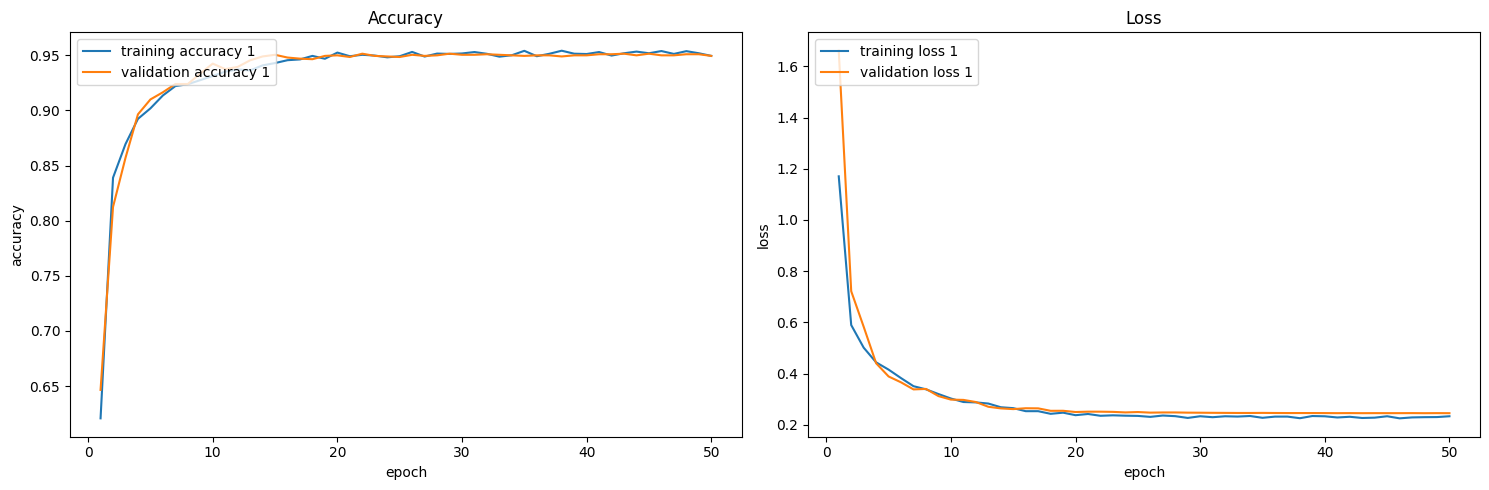

In [5]:
model.compile(
    loss=LOSS, 
    optimizer=OPTIMIZER,
    metrics=["accuracy"]
)

hist = model.fit(train_dataset, epochs=50, validation_data=valid_dataset)

visualization.training_history(hist)

## Loading Trained Model

In [6]:
model = keras.models.load_model(os.path.join('trained_models','cnn', 'with_data_aug', '25000', 'training1.model.keras'))

## Evaluation

### Accuracy

In [7]:
loss, accuracy = model.evaluate(test_dataset)

print(f'{accuracy=:.4f}')
print(f'{loss=:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9570 - loss: 0.2252
accuracy=0.9554
loss=0.2306


### Confusion Matrix

 30/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


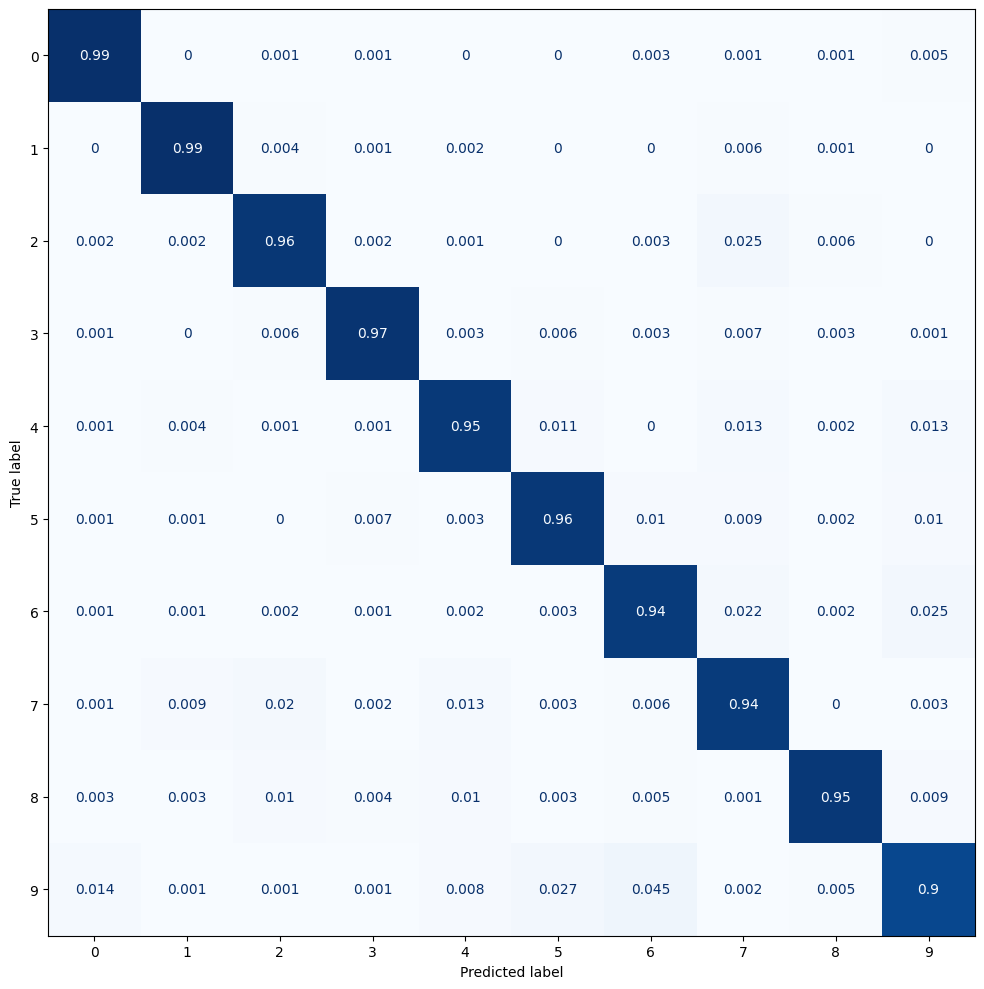

In [8]:
cm = utils.get_confusion_matrix(model, test_dataset, test_y, class_names=list(range(10)))
visualization.confusion_matrix(cm, class_names=list(range(10)))

## Kernel Visualization

In [ ]:
from ipywidgets import interact, Dropdown

# prepare widgets
conv_layers = [(layer.name, layer) for layer in model.layers if isinstance(layer, layers.Conv2D)]
layerW = Dropdown(options=conv_layers)
in_channelW = Dropdown(description='in channel')
out_channelW = Dropdown(description='out channel')

def update_options(*args):
    """Updates the channel widgets when the layer changes."""
    layer = layerW.value
    in_channelW.options = range(layer.input.shape[-1])
    out_channelW.options = range(layer.output.shape[-1])
    
    if in_channelW.value not in in_channelW.options:
        in_channelW.value = 0
    if out_channelW.value not in out_channelW.options:
        out_channelW.value = 0
        
layerW.observe(update_options)

@interact(layer=layerW, in_channel=in_channelW, out_channel=out_channelW)
def show_filters(layer, in_channel=0, out_channel=0):
    """Shows the filters of the conv layer for the given input and output channel."""
    filters = layer.kernel
    
    selected_filter = filters[:, :, in_channel, out_channel] 

    visualization.image_grid([selected_filter])
    

## Feature Map Visualization

In [10]:
def layer_output(layer, inpt):
    """Computes the layer's output for the given model input."""
    layer_out = keras.Model(inputs=model.inputs, outputs=[layer.output])
    return layer_out(inpt[np.newaxis,:], training=False)[0].numpy()


In [ ]:
from ipywidgets import interact, Dropdown, FloatSlider, BoundedIntText

# prepare widgets
layerW = Dropdown(options = [(layer.name, layer) for layer in model.layers])
channelW = Dropdown()
imgW = BoundedIntText(min=0, max=len(test_x)-1, description='image nr')
rotW = FloatSlider(min=0, max=360, step=360/16, value=90, description='rotation')

def update_options(*args):
    """Updates the channel widgets when the layer changes."""
    layer = layerW.value
    channelW.options = range(layer.output.shape[-1])
    
    if channelW.value not in channelW.options:
        channelW.value = 0
        
layerW.observe(update_options)

@interact(layer=layerW, channel=channelW, img_nr=imgW, rot=rotW)
def show_layer_output(layer, channel=0, img_nr=0, rot=90):
    """Shows the layer's output for both an unrotated and rotated version of the image."""
    # prepare input
    img = test_x[img_nr]
    img_rot = utils.rotate_image(img, rot)
    
    # calculate layer output
    out = layer_output(layer, img)[...,channel] # shape=[h,w]
    out_rot = layer_output(layer, img_rot)[...,channel] # shape=[h,w]
    
    # unify dimensions
    if len(out.shape) == 0:
        out = out[..., np.newaxis, np.newaxis]
        out_rot = out_rot[..., np.newaxis, np.newaxis]
    
    out_rot_reversed = utils.rotate_image(out_rot, -rot)
    
    # show layer output
    visualization.image_grid([out, out_rot, out_rot_reversed], 
                             ['original input', f'{rot:.2f}° rotated input', f'{rot:.2f}° rotated input (reversed rotation)'])

## Equivariance

In [ ]:
from ipywidgets import interact, FloatSlider, BoundedIntText

imgW = BoundedIntText(min=0, max=len(test_x)-1, description='image nr')
rotW = FloatSlider(min=0, max=360, step=360/16, value=90, description='input rotation')

@interact(img_nr=imgW, input_rot=rotW)
def show_equivariance(img_nr=0, input_rot=90):
    img = test_x[img_nr]
    print('digit:', test_y[img_nr])
    img_rot = utils.rotate_image(img, input_rot)

    out, out_rot = model(np.vstack([img, img_rot]), training=False)

    print('equal model output:', np.isclose(out, out_rot, rtol=1e-5, atol=1e-3).all())
    print('output distance:', np.linalg.norm(out-out_rot).round(3))

    visualization.image_grid([out[np.newaxis,:], out_rot[np.newaxis,:]], 
                            labels=['original input', '90° rotated input'], 
                            cols=1, figsize=(5,3))